In [1]:
import time
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import f_classif, mutual_info_classif, VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from scipy.spatial.distance import cdist , pdist
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
np.random.seed(42)


#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Allow long lines

In [2]:
# Specify the path to the CSV file in the parent directory
file_path = "../Dataset/pd_speech_features/pd_speech_features.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=',',skiprows=1)

# SMOTE

In [3]:
X=df.drop('class',axis=1)
y=df['class']
smote_female = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote_female.fit_resample(X, y)

In [4]:
unique, counts = np.unique(y, return_counts=True)
original_class_distribution = dict(zip(unique, counts))
unique, counts = np.unique(y_smote, return_counts=True)
resampled_class_distribution = dict(zip(unique, counts))

print("Original class distribution:", original_class_distribution)
print("Resampled class distribution:", resampled_class_distribution)

Original class distribution: {0: 192, 1: 564}
Resampled class distribution: {0: 564, 1: 564}


# Normalization

In [5]:
features = X_smote.columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the features
X_smote_scaled = pd.DataFrame(scaler.fit_transform(X_smote[features]), columns=features)

# Correlation

In [6]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any further insight.

def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

In [7]:
corr_features = correlation(X_smote_scaled, 0.8)
print(len(set(corr_features)))

0.9999432689018055 numPeriodsPulses numPulses
0.8986132933725358 meanPeriodPulses numPulses
0.8983673930084992 meanPeriodPulses numPeriodsPulses
0.9661935294503162 locAbsJitter locPctJitter
0.9630044333235679 rapJitter locPctJitter
0.9523930582366162 rapJitter locAbsJitter
0.9588585734818649 ppq5Jitter locPctJitter
0.9463274034200975 ppq5Jitter locAbsJitter
0.9730870895529791 ppq5Jitter rapJitter
0.9630138707762759 ddpJitter locPctJitter
0.9524350064260689 ddpJitter locAbsJitter
0.9999952815668337 ddpJitter rapJitter
0.9730904927213517 ddpJitter ppq5Jitter
0.9963555383695369 locDbShimmer locShimmer
0.98227423726979 apq3Shimmer locShimmer
0.9753334571838319 apq3Shimmer locDbShimmer
0.9794835275244602 apq5Shimmer locShimmer
0.9739622437541159 apq5Shimmer locDbShimmer
0.9600580219538976 apq5Shimmer apq3Shimmer
0.8923216472144624 apq11Shimmer locShimmer
0.8952548895514163 apq11Shimmer locDbShimmer
0.8426943117841876 apq11Shimmer apq3Shimmer
0.9145399117118357 apq11Shimmer apq5Shimmer
0.982

0.9396270055267213 det_TKEO_std_6_coef det_TKEO_mean_6_coef
0.9947971191711923 det_TKEO_std_7_coef det_entropy_shannon_7_coef
0.9947263903997567 det_TKEO_std_7_coef det_TKEO_mean_7_coef
0.8375838168280062 det_TKEO_std_8_coef Ed_8_coef
0.998711931947521 det_TKEO_std_8_coef det_entropy_shannon_8_coef
0.8501543512192303 det_TKEO_std_8_coef det_entropy_shannon_10_coef
0.9976591186942799 det_TKEO_std_8_coef det_TKEO_mean_8_coef
0.8470955108430042 det_TKEO_std_8_coef det_TKEO_mean_10_coef
0.9785069536159291 det_TKEO_std_9_coef det_entropy_shannon_9_coef
0.9851255042333779 det_TKEO_std_9_coef det_TKEO_mean_9_coef
0.8106731965351102 det_TKEO_std_10_coef Ed_8_coef
0.8200533799917942 det_TKEO_std_10_coef Ed_10_coef
0.8540358565187819 det_TKEO_std_10_coef det_entropy_shannon_8_coef
0.9982771235533205 det_TKEO_std_10_coef det_entropy_shannon_10_coef
0.8305473294117033 det_TKEO_std_10_coef det_TKEO_mean_8_coef
0.9990122023620508 det_TKEO_std_10_coef det_TKEO_mean_10_coef
0.8577245483744332 det_TKEO

0.8764312280038522 app_TKEO_std_7_coef app_entropy_log_6_coef
0.8779232458817184 app_TKEO_std_7_coef app_entropy_log_7_coef
0.8891981713323915 app_TKEO_std_7_coef app_entropy_log_8_coef
0.8892803531493612 app_TKEO_std_7_coef app_entropy_log_9_coef
0.8894850905987589 app_TKEO_std_7_coef app_entropy_log_10_coef
0.8836241010672913 app_TKEO_std_7_coef app_det_TKEO_mean_2_coef
0.9655340730849543 app_TKEO_std_7_coef app_det_TKEO_mean_3_coef
0.991739697528789 app_TKEO_std_7_coef app_det_TKEO_mean_4_coef
0.9963725030756415 app_TKEO_std_7_coef app_det_TKEO_mean_5_coef
0.9978487654176796 app_TKEO_std_7_coef app_det_TKEO_mean_6_coef
0.9973929963711774 app_TKEO_std_7_coef app_det_TKEO_mean_7_coef
0.9953346215150042 app_TKEO_std_7_coef app_det_TKEO_mean_8_coef
0.9951091019600106 app_TKEO_std_7_coef app_det_TKEO_mean_9_coef
0.9939049519181348 app_TKEO_std_7_coef app_det_TKEO_mean_10_coef
0.9129191044962713 app_TKEO_std_7_coef app_TKEO_std_2_coef
0.9639569086941203 app_TKEO_std_7_coef app_TKEO_std_3_

0.9619336120790746 det_LT_TKEO_mean_4_coef Ed2_4_coef
0.8431930489994711 det_LT_TKEO_mean_5_coef Ed_5_coef
0.9027005094706825 det_LT_TKEO_mean_5_coef det_entropy_shannon_5_coef
0.9458185458292513 det_LT_TKEO_mean_5_coef det_TKEO_mean_5_coef
0.9151675399483856 det_LT_TKEO_mean_5_coef det_TKEO_std_5_coef
0.955439932955571 det_LT_TKEO_mean_5_coef Ed2_5_coef
0.8439407149810602 det_LT_TKEO_mean_6_coef det_entropy_shannon_6_coef
0.9122341724831904 det_LT_TKEO_mean_6_coef det_TKEO_mean_6_coef
0.845054536942928 det_LT_TKEO_mean_6_coef det_TKEO_std_6_coef
0.9634183197227807 det_LT_TKEO_mean_6_coef Ed2_6_coef
0.8307108545228145 det_LT_TKEO_mean_6_coef det_LT_entropy_shannon_6_coef
0.9129362222647996 det_LT_TKEO_mean_7_coef det_entropy_shannon_7_coef
0.9257889453862468 det_LT_TKEO_mean_7_coef det_TKEO_mean_7_coef
0.9049692805653687 det_LT_TKEO_mean_7_coef det_TKEO_std_7_coef
0.9859020860229779 det_LT_TKEO_mean_7_coef Ed2_7_coef
0.8928420698677463 det_LT_TKEO_mean_7_coef det_LT_entropy_shannon_7_c

0.8172485467141479 app_LT_TKEO_mean_3_coef app_entropy_log_7_coef
0.9038953135183375 app_LT_TKEO_mean_3_coef app_entropy_log_8_coef
0.9039853594067778 app_LT_TKEO_mean_3_coef app_entropy_log_9_coef
0.903749389816184 app_LT_TKEO_mean_3_coef app_entropy_log_10_coef
0.8228891588015876 app_LT_TKEO_mean_3_coef app_det_TKEO_mean_3_coef
0.8508420149380138 app_LT_TKEO_mean_3_coef app_det_TKEO_mean_4_coef
0.8468535807614473 app_LT_TKEO_mean_3_coef app_det_TKEO_mean_5_coef
0.8415875273664494 app_LT_TKEO_mean_3_coef app_det_TKEO_mean_6_coef
0.8406233503949673 app_LT_TKEO_mean_3_coef app_det_TKEO_mean_7_coef
0.8344814540031621 app_LT_TKEO_mean_3_coef app_det_TKEO_mean_8_coef
0.8346545950137954 app_LT_TKEO_mean_3_coef app_det_TKEO_mean_9_coef
0.8344920137966597 app_LT_TKEO_mean_3_coef app_det_TKEO_mean_10_coef
0.8325845823929015 app_LT_TKEO_mean_3_coef app_TKEO_std_4_coef
0.8387069474413714 app_LT_TKEO_mean_3_coef app_TKEO_std_5_coef
0.8379235304947915 app_LT_TKEO_mean_3_coef app_TKEO_std_6_coef
0.

0.814806541976034 tqwt_energy_dec_8 tqwt_energy_dec_6
0.9325744102962016 tqwt_energy_dec_8 tqwt_energy_dec_7
0.8294934196440819 tqwt_energy_dec_10 tqwt_energy_dec_9
0.8446792177053797 tqwt_energy_dec_11 tqwt_energy_dec_10
0.8900775301721547 tqwt_energy_dec_13 tqwt_energy_dec_12
0.8174266308452951 tqwt_energy_dec_14 tqwt_energy_dec_13
0.8309870741858962 tqwt_energy_dec_15 tqwt_energy_dec_14
0.8341849889822975 tqwt_energy_dec_16 tqwt_energy_dec_15
0.9194820072178177 tqwt_energy_dec_33 tqwt_energy_dec_32
0.8988895543508998 tqwt_energy_dec_34 tqwt_energy_dec_33
0.8060361320305882 tqwt_energy_dec_35 tqwt_energy_dec_34
0.8851841749910472 tqwt_energy_dec_36 tqwt_energy_dec_35
0.8714949833713949 tqwt_entropy_shannon_dec_2 tqwt_entropy_shannon_dec_1
0.915699505732548 tqwt_entropy_shannon_dec_3 tqwt_entropy_shannon_dec_2
0.8765115915509618 tqwt_entropy_shannon_dec_4 tqwt_entropy_shannon_dec_3
0.8241197623917204 tqwt_entropy_shannon_dec_5 tqwt_energy_dec_5
0.8957175199175139 tqwt_entropy_shannon_

0.9412856070807798 tqwt_TKEO_mean_dec_6 tqwt_TKEO_mean_dec_5
0.9366232565220948 tqwt_TKEO_mean_dec_7 tqwt_energy_dec_7
0.8794896866205161 tqwt_TKEO_mean_dec_7 tqwt_energy_dec_8
0.924094609424763 tqwt_TKEO_mean_dec_7 tqwt_entropy_shannon_dec_6
0.9853662274812941 tqwt_TKEO_mean_dec_7 tqwt_entropy_shannon_dec_7
0.8875533286610379 tqwt_TKEO_mean_dec_7 tqwt_entropy_shannon_dec_8
0.8331191462290617 tqwt_TKEO_mean_dec_7 tqwt_TKEO_mean_dec_5
0.9106966046875573 tqwt_TKEO_mean_dec_7 tqwt_TKEO_mean_dec_6
0.8971299478707667 tqwt_TKEO_mean_dec_8 tqwt_energy_dec_7
0.9311010886662842 tqwt_TKEO_mean_dec_8 tqwt_energy_dec_8
0.8401383112664705 tqwt_TKEO_mean_dec_8 tqwt_entropy_shannon_dec_6
0.9542051056084184 tqwt_TKEO_mean_dec_8 tqwt_entropy_shannon_dec_7
0.9670369428553662 tqwt_TKEO_mean_dec_8 tqwt_entropy_shannon_dec_8
0.835971857425759 tqwt_TKEO_mean_dec_8 tqwt_TKEO_mean_dec_6
0.9428123981696248 tqwt_TKEO_mean_dec_8 tqwt_TKEO_mean_dec_7
0.8359776705971437 tqwt_TKEO_mean_dec_9 tqwt_entropy_shannon_de

0.9539315070099386 tqwt_TKEO_std_dec_14 tqwt_TKEO_mean_dec_14
0.8699877741092709 tqwt_TKEO_std_dec_14 tqwt_TKEO_std_dec_13
0.8053973759271457 tqwt_TKEO_std_dec_15 tqwt_energy_dec_15
0.8950027332858559 tqwt_TKEO_std_dec_15 tqwt_entropy_shannon_dec_14
0.9043465558483539 tqwt_TKEO_std_dec_15 tqwt_entropy_shannon_dec_15
0.8249484553433851 tqwt_TKEO_std_dec_15 tqwt_TKEO_mean_dec_14
0.9350976558806199 tqwt_TKEO_std_dec_15 tqwt_TKEO_mean_dec_15
0.8275657688257754 tqwt_TKEO_std_dec_15 tqwt_TKEO_mean_dec_16
0.8609044022063623 tqwt_TKEO_std_dec_15 tqwt_TKEO_std_dec_14
0.8892448701381013 tqwt_TKEO_std_dec_16 tqwt_entropy_shannon_dec_15
0.8571546992315826 tqwt_TKEO_std_dec_16 tqwt_entropy_shannon_dec_16
0.8317989540237014 tqwt_TKEO_std_dec_16 tqwt_TKEO_mean_dec_15
0.9153383421179282 tqwt_TKEO_std_dec_16 tqwt_TKEO_mean_dec_16
0.8810537946764994 tqwt_TKEO_std_dec_16 tqwt_TKEO_std_dec_15
0.8751877891562687 tqwt_TKEO_std_dec_17 tqwt_TKEO_mean_dec_17
0.8813381172490324 tqwt_TKEO_std_dec_18 tqwt_TKEO_me

0.842605327730946 tqwt_stdValue_dec_19 tqwt_entropy_log_dec_19
0.9169452246045531 tqwt_stdValue_dec_19 tqwt_TKEO_mean_dec_19
0.8315967056552671 tqwt_stdValue_dec_19 tqwt_TKEO_std_dec_18
0.918787226001798 tqwt_stdValue_dec_19 tqwt_TKEO_std_dec_19
0.8616031399183676 tqwt_stdValue_dec_19 tqwt_stdValue_dec_18
0.8956130151842611 tqwt_stdValue_dec_20 tqwt_entropy_shannon_dec_20
0.8302849427588785 tqwt_stdValue_dec_20 tqwt_entropy_log_dec_20
0.888205978442965 tqwt_stdValue_dec_20 tqwt_TKEO_mean_dec_20
0.8628486013121198 tqwt_stdValue_dec_21 tqwt_entropy_shannon_dec_21
0.8369608464330465 tqwt_stdValue_dec_21 tqwt_entropy_log_dec_21
0.8700148198912733 tqwt_stdValue_dec_21 tqwt_TKEO_mean_dec_21
0.8240313018965627 tqwt_stdValue_dec_21 tqwt_TKEO_std_dec_21
0.8602340698644151 tqwt_stdValue_dec_22 tqwt_entropy_shannon_dec_22
0.8199765018209455 tqwt_stdValue_dec_22 tqwt_entropy_log_dec_22
0.9069811601628839 tqwt_stdValue_dec_22 tqwt_TKEO_mean_dec_22
0.8345877374083819 tqwt_stdValue_dec_22 tqwt_TKEO_s

0.8721716158846917 tqwt_minValue_dec_28 tqwt_TKEO_mean_dec_28
0.854536769767194 tqwt_minValue_dec_28 tqwt_TKEO_std_dec_28
0.9606142419682143 tqwt_minValue_dec_28 tqwt_stdValue_dec_28
0.8336957518392479 tqwt_minValue_dec_28 tqwt_minValue_dec_27
0.8046213494009958 tqwt_minValue_dec_29 tqwt_energy_dec_29
0.8435796041189683 tqwt_minValue_dec_29 tqwt_TKEO_std_dec_29
0.9412154120943402 tqwt_minValue_dec_29 tqwt_stdValue_dec_29
0.8042140610305172 tqwt_minValue_dec_29 tqwt_stdValue_dec_30
0.8195996409385793 tqwt_minValue_dec_29 tqwt_minValue_dec_28
0.9120260635306449 tqwt_minValue_dec_30 tqwt_stdValue_dec_30
0.8473016654214636 tqwt_minValue_dec_30 tqwt_minValue_dec_29
0.8019548816298873 tqwt_minValue_dec_31 tqwt_TKEO_std_dec_31
0.9418258361671843 tqwt_minValue_dec_31 tqwt_stdValue_dec_31
0.8291497428543185 tqwt_minValue_dec_31 tqwt_stdValue_dec_32
0.80441601618802 tqwt_minValue_dec_32 tqwt_TKEO_std_dec_33
0.8918403876396719 tqwt_minValue_dec_32 tqwt_stdValue_dec_31
0.9667437330079001 tqwt_minV

0.8854963186425375 tqwt_maxValue_dec_15 tqwt_stdValue_dec_14
0.9338613435469393 tqwt_maxValue_dec_15 tqwt_stdValue_dec_15
0.8723979914383693 tqwt_maxValue_dec_15 tqwt_stdValue_dec_16
0.9402657853252403 tqwt_maxValue_dec_15 tqwt_minValue_dec_14
0.9904028695021774 tqwt_maxValue_dec_15 tqwt_minValue_dec_15
0.9406040339139898 tqwt_maxValue_dec_15 tqwt_minValue_dec_16
0.9389242775181966 tqwt_maxValue_dec_15 tqwt_maxValue_dec_14
0.8617344083029468 tqwt_maxValue_dec_16 tqwt_entropy_shannon_dec_15
0.8950396984165899 tqwt_maxValue_dec_16 tqwt_entropy_shannon_dec_16
0.8354022141770517 tqwt_maxValue_dec_16 tqwt_entropy_log_dec_15
0.8497385246537265 tqwt_maxValue_dec_16 tqwt_entropy_log_dec_16
0.8154352317823875 tqwt_maxValue_dec_16 tqwt_TKEO_mean_dec_16
0.8190468253945214 tqwt_maxValue_dec_16 tqwt_TKEO_std_dec_15
0.9120801790343396 tqwt_maxValue_dec_16 tqwt_TKEO_std_dec_16
0.8045430189282567 tqwt_maxValue_dec_16 tqwt_TKEO_std_dec_17
0.8031121033462133 tqwt_maxValue_dec_16 tqwt_stdValue_dec_14
0.8

0.8563657606684284 tqwt_maxValue_dec_34 tqwt_TKEO_std_dec_34
0.8306272194868954 tqwt_maxValue_dec_34 tqwt_TKEO_std_dec_35
0.9384593802703662 tqwt_maxValue_dec_34 tqwt_stdValue_dec_34
0.9246032898938407 tqwt_maxValue_dec_34 tqwt_stdValue_dec_35
0.8316838404877986 tqwt_maxValue_dec_34 tqwt_stdValue_dec_36
0.8780450200060271 tqwt_maxValue_dec_34 tqwt_minValue_dec_33
0.9671477869456644 tqwt_maxValue_dec_34 tqwt_minValue_dec_34
0.9244714028715241 tqwt_maxValue_dec_34 tqwt_minValue_dec_35
0.8600719476023208 tqwt_maxValue_dec_34 tqwt_maxValue_dec_33
0.8536052419058213 tqwt_maxValue_dec_35 tqwt_entropy_shannon_dec_35
0.8793787055746625 tqwt_maxValue_dec_35 tqwt_TKEO_std_dec_35
0.8287980372098104 tqwt_maxValue_dec_35 tqwt_stdValue_dec_34
0.9353308833038202 tqwt_maxValue_dec_35 tqwt_stdValue_dec_35
0.8709776020823286 tqwt_maxValue_dec_35 tqwt_stdValue_dec_36
0.9131168704247344 tqwt_maxValue_dec_35 tqwt_minValue_dec_34
0.9646944491422381 tqwt_maxValue_dec_35 tqwt_minValue_dec_35
0.843738860865135

In [8]:
X_smote_scaled_correlated = X_smote_scaled
X_smote_scaled_correlated.drop(labels=corr_features, axis=1, inplace=True)


X_smote_scaled_correlated.shape

(1128, 263)

In [9]:
K = range (1, 10)
KM = [KMeans(n_clusters=k).fit(X_smote_scaled_correlated) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X_smote_scaled_correlated,cent,"euclidean") for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]


In [10]:
# total with -in sum of square
wcss = [sum(d**2) for d in dist ]
tss = sum(pdist(X_smote_scaled_correlated)**2)/X_smote_scaled_correlated. shape [0]
bss = tss - wcss
varExplained = bss / tss * 100

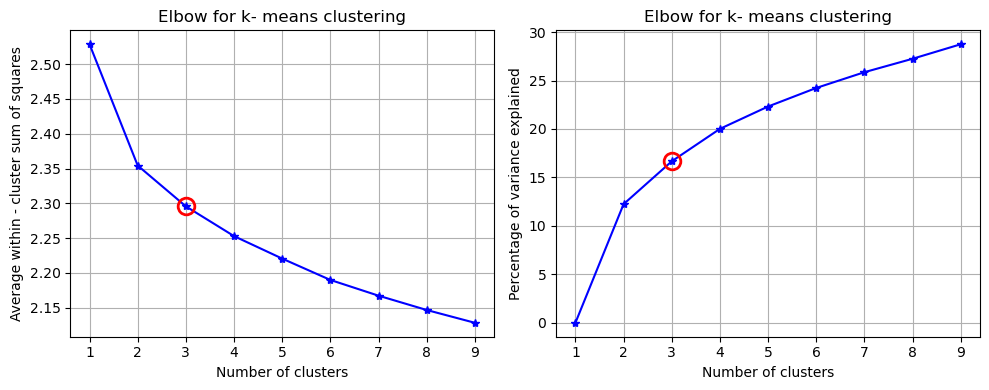

In [11]:
kIdx = 2
# plot
plt.figure(figsize =(10 , 4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS , 'b*-')
plt.plot(K[kIdx], avgWithinSS [ kIdx ], marker ='o', markersize =12 ,
          markeredgewidth =2, markeredgecolor ='r', markerfacecolor ='None')
plt.grid (True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within - cluster sum of squares')
plt.title('Elbow for k- means clustering')
plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx],varExplained[kIdx], marker ='o', markersize =12 ,markeredgewidth =2, markeredgecolor ='r', markerfacecolor ='None')
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("Percentage of variance explained")
plt.title("Elbow for k- means clustering")
plt.tight_layout()
plt.savefig("kmeans_elbow.png")
plt.show()

# Drop da Coluna Id

In [12]:
X_smote_scaled_correlated = X_smote_scaled_correlated.drop("id", axis=1)


# Split para dados de treino e teste e Logistic Regression

In [14]:
# Step 1: Cluster the data using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_smote_scaled_correlated)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test, cluster_train, cluster_test = train_test_split(X_smote_scaled_correlated, 
                                                                                 y_smote, 
                                                                                 cluster_labels, 
                                                                                 test_size=0.2, 
                                                                                 random_state=42)

# Step 3: Train and evaluate a classifier for each cluster
unique_clusters = np.unique(cluster_labels)

for cluster in unique_clusters:
    cluster_X_train = X_train[cluster_train == cluster]
    cluster_y_train = y_train[cluster_train == cluster]
    cluster_X_test = X_test[cluster_test == cluster]
    cluster_y_test = y_test[cluster_test == cluster]

    # Create a logistic regression classifier for this cluster
    classifier = LogisticRegression()
    classifier.fit(cluster_X_train, cluster_y_train)

    # Evaluate the classifier for this cluster
    accuracy = classifier.score(cluster_X_test, cluster_y_test)
    print(f"Cluster {cluster} - Accuracy: {accuracy:.2f}")

# Overall evaluation
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
overall_accuracy = classifier.score(X_test, y_test)
print(f"Overall Accuracy: {overall_accuracy:.2f}")


Cluster 0 - Accuracy: 0.91
Cluster 1 - Accuracy: 0.87
Cluster 2 - Accuracy: 0.88
Overall Accuracy: 0.86


# Split para dados de treino e teste e Random Forest

In [15]:
# Step 1: Cluster the data using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_smote_scaled_correlated)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test, cluster_train, cluster_test = train_test_split(X_smote_scaled_correlated, 
                                                                                 y_smote, 
                                                                                 cluster_labels, 
                                                                                 test_size=0.2, 
                                                                                 random_state=42)

# Step 3: Train a Random Forest classifier for each cluster
unique_clusters = np.unique(cluster_labels)
rf_models = {}

for cluster in unique_clusters:
    cluster_X_train = X_train[cluster_train == cluster]
    cluster_y_train = y_train[cluster_train == cluster]
    
    cluster_X_test = X_test[cluster_test == cluster]
    cluster_y_test = y_test[cluster_test == cluster]
    
    
    # Create a Random Forest classifier for this cluster
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(cluster_X_train, cluster_y_train)

    # Store the classifier in a dictionary
    rf_models[cluster] = rf_classifier
    
    # Evaluate the classifier for this cluster
    accuracy = classifier.score(cluster_X_test, cluster_y_test)
    print(f"Cluster {cluster} - Accuracy: {accuracy:.2f}")


# Overall evaluation
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
overall_accuracy = classifier.score(X_test, y_test)
print(f"Overall Accuracy: {overall_accuracy:.2f}")


Cluster 0 - Accuracy: 0.88
Cluster 1 - Accuracy: 0.84
Cluster 2 - Accuracy: 0.86
Overall Accuracy: 0.92


# Split para dados de treino e teste e SVM

In [16]:
# Step 1: Cluster the data using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_smote_scaled_correlated)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test, cluster_train, cluster_test = train_test_split(X_smote_scaled_correlated, 
                                                                                 y_smote, 
                                                                                 cluster_labels, 
                                                                                 test_size=0.2, 
                                                                                 random_state=42)

# Step 3: Train a Random Forest classifier for each cluster
unique_clusters = np.unique(cluster_labels)
rf_models = {}

for cluster in unique_clusters:
    cluster_X_train = X_train[cluster_train == cluster]
    cluster_y_train = y_train[cluster_train == cluster]
    
    cluster_X_test = X_test[cluster_test == cluster]
    cluster_y_test = y_test[cluster_test == cluster]
    
    
    # Create a Random Forest classifier for this cluster
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(cluster_X_train, cluster_y_train)
    
    # Evaluate the classifier for this cluster
    accuracy = classifier.score(cluster_X_test, cluster_y_test)
    print(f"Cluster {cluster} - Accuracy: {accuracy:.2f}")


# Overall evaluation
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
overall_accuracy = svm_classifier.score(X_test, y_test)
print(f"Overall Accuracy: {overall_accuracy:.2f}")


Cluster 0 - Accuracy: 0.93
Cluster 1 - Accuracy: 0.93
Cluster 2 - Accuracy: 0.91
Overall Accuracy: 0.87


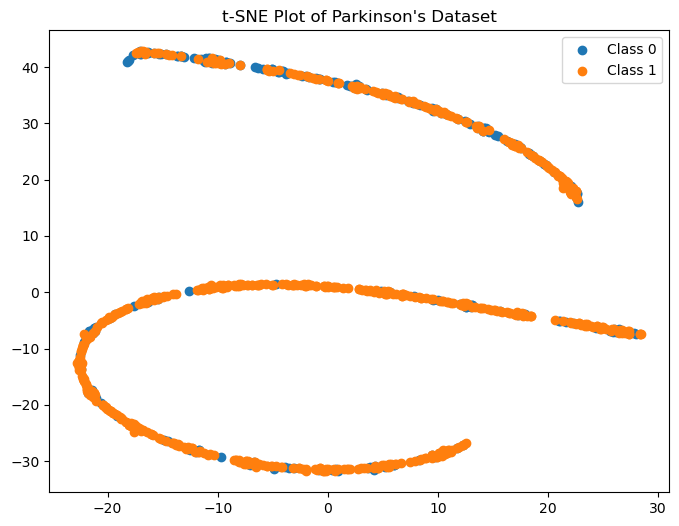

In [18]:
# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot data points with colors based on their target labels
for i in np.unique(y):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=f'Class {i}')

plt.legend()
plt.title('t-SNE Plot of Parkinson\'s Dataset')
plt.show()


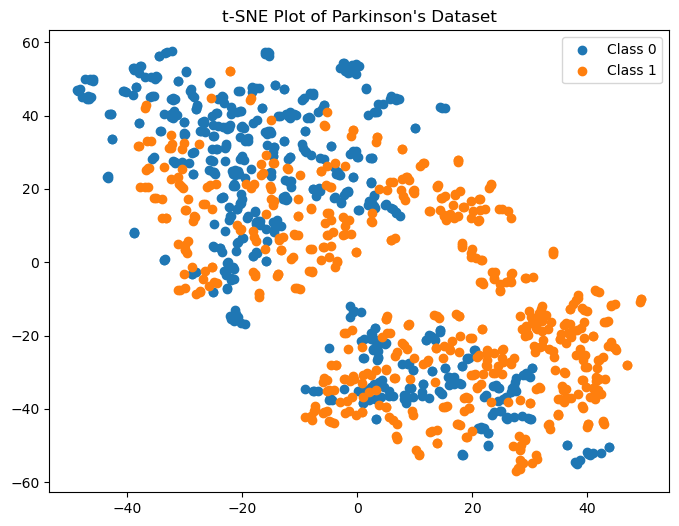

In [19]:
# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_smote_scaled_correlated)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot data points with colors based on their target labels
for i in np.unique(y):
    plt.scatter(X_tsne[y_smote == i, 0], X_tsne[y_smote == i, 1], label=f'Class {i}')

plt.legend()
plt.title('t-SNE Plot of Parkinson\'s Dataset')
plt.show()

